# Linear Image Registration with AIRLAB

This notebook is adapted from https://github.com/airlab-unibas/airlab/blob/master/examples/affine_registration_3d.py

In [1]:
import airlab as al
import numpy as np
import torch

import utility as util

## Load images

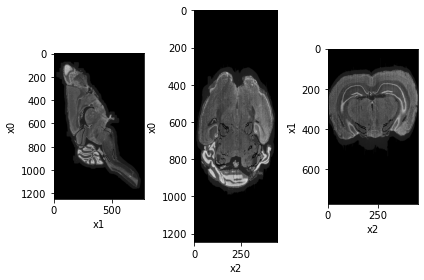

In [2]:
fixed_image = np.load('../data/local/MD589_CH1.npy')
fixed_image = util.normalize_intensity(fixed_image)
util.imshow_midslice(fixed_image)

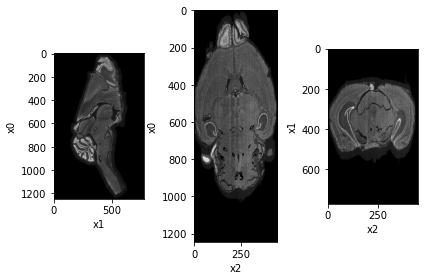

In [3]:
moving_image = np.load('../data/local/MD594_CH1.npy')
moving_image = util.normalize_intensity(moving_image)
util.imshow_midslice(moving_image)

## Prepare images for registration

In [4]:
dtype = torch.float32
device = torch.device('cpu')
fixed_image = torch.tensor(fixed_image, dtype=dtype).to(device)
fixed_image = al.Image(fixed_image, fixed_image.shape, [1, 1, 1], [0, 0, 0])
moving_iamge = torch.tensor(moving_image, dtype=dtype).to(device)
moving_image = al.Image(moving_image, moving_image.shape, [1, 1, 1], [0, 0, 0])

## Set up registration

In [6]:
lr = 1e-2
niter = 3

registration = al.PairwiseRegistration()
transformation = al.transformation.pairwise.AffineTransformation(moving_image)
transformation.init_translation(fixed_image)
registration.set_transformation(transformation)
image_loss = al.loss.pairwise.MSE(fixed_image, moving_image)
registration.set_image_loss([image_loss])
optimizer = torch.optim.Adam(transformation.parameters(), lr=lr)
registration.set_optimizer(optimizer)
registration.set_number_of_iterations(niter)

## Run registration

In [7]:
import time

start = time.time()
registration.start()
end = time.time()
print((end - start) / 60, 'min')

0 

/home/b2dong/registration-study/env/lib/python3.8/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


mse: 0.016622556271029338 


/home/b2dong/registration-study/env/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


1 mse: 0.016467752894491695 
2 mse: 0.016429381031419638 
5.558342734972636 min


## Examine results

In [8]:
transformation.print()

_phi_z 0.022052651271224022
_t_x 0.02154195756133065
_t_y 0.22175252618799257
_t_z -0.04901590351708493
_phi_x -0.013279366306960583
_phi_y -0.022274216637015343
_scale_x 1.0252195596694946
_scale_y 1.0291916131973267
_scale_z 1.029619574546814
_shear_y_x -0.018330441787838936
_shear_x_y 0.005541068967431784
_shear_z_x -0.022000113502144814
_shear_z_y -0.02755982056260109
_shear_x_z 0.02079865336418152
_shear_y_z -0.025504769757390022


In [9]:
displacement = transformation.get_displacement()
warped_image = al.transformation.utils.warp_image(moving_image, displacement)

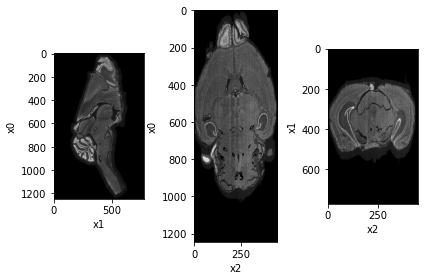

In [10]:
util.imshow_midslice(moving_image.image[0,0].numpy())

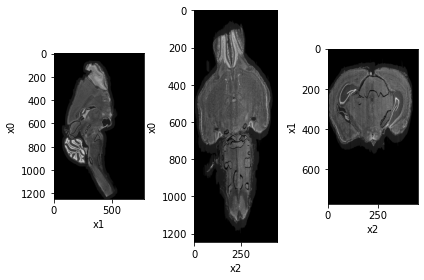

In [11]:
util.imshow_midslice(warped_image.image[0,0].numpy())

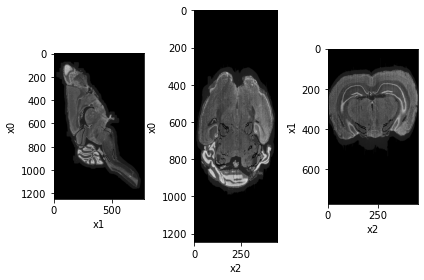

In [12]:
util.imshow_midslice(fixed_image.image[0,0].numpy())